In [8]:
import torch
from torch import nn
import torch.nn.functional as f
import torch.utils.data.dataloader as dataloader
import torch.optim as optim

from torchvision import transforms
from torchvision.datasets import MNIST
import torchvision
 
 
from tqdm.notebook import trange, tqdm
import numpy as np
import matplotlib.pyplot as plt
import time

In [4]:
batch_size= 256

train = MNIST('../data', train=True, download=True, transform=transforms.ToTensor())
test = MNIST('../data', train=False, download=True, transform=transforms.ToTensor())



train_loader= dataloader.DataLoader(train, shuffle=True, batch_size= batch_size,num_workers=0,pin_memory=False)
test_loader= dataloader.DataLoader(test, shuffle=False, batch_size= batch_size,num_workers=0,pin_memory=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:06<00:00, 1492045.47it/s]


Extracting ../data\MNIST\raw\train-images-idx3-ubyte.gz to ../data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 122685.46it/s]


Extracting ../data\MNIST\raw\train-labels-idx1-ubyte.gz to ../data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:03<00:00, 430290.10it/s]


Extracting ../data\MNIST\raw\t10k-images-idx3-ubyte.gz to ../data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 772684.19it/s]

Extracting ../data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\MNIST\raw



In [5]:
images , labels = next(iter(train_loader))
print("The input data shape is :\n", images.shape)
print("The target output data shape is :\n", labels.shape)

The input data shape is :
 torch.Size([256, 1, 28, 28])
The target output data shape is :
 torch.Size([256])


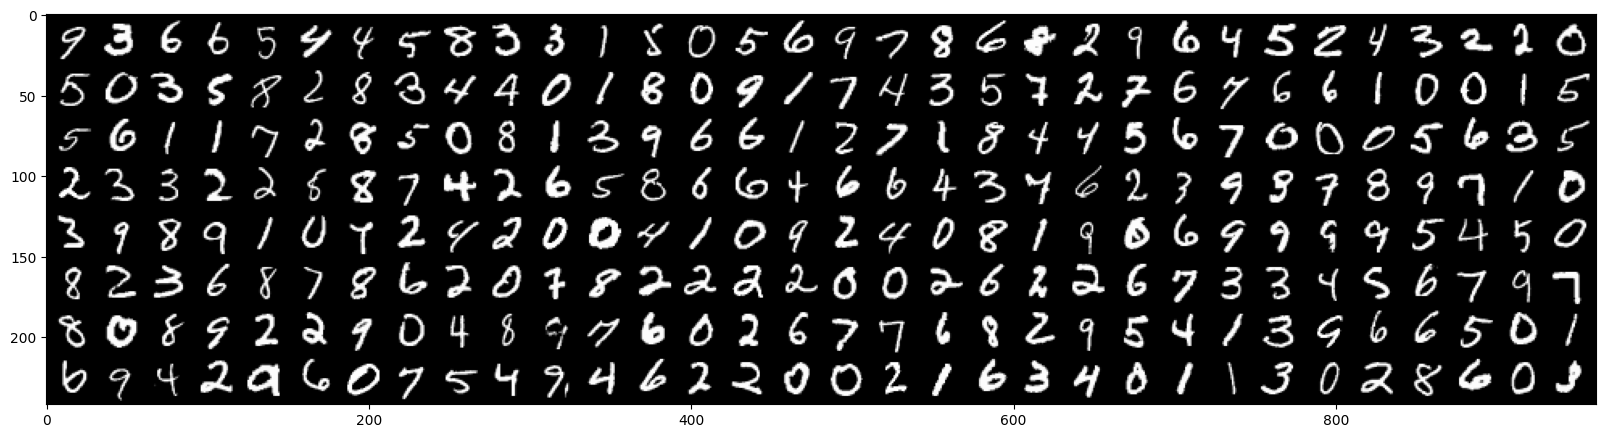

In [6]:
plt.figure(figsize=(20,10))
out= torchvision.utils.make_grid(images,32)
plt.imshow(out.numpy().transpose(1,2,0))

In [58]:
class Simple_Mlp(nn.Module):
    def __init__(self,input_shape,num_classes):
        
        super(Simple_Mlp,self).__init__()
        
        self.fc1= nn.Linear(input_shape,512)
        self.fc2= nn.Linear(512,256)
        self.fc3= nn.Linear(256,128)
        self.fc4= nn.Linear(128,num_classes)
        
        
    def forward(self,x):
        
        x = x.view(x.shape[0],-1)
        
        x= f.relu(self.fc1(x))
        x=f.relu(self.fc2(x))
        x= f.relu(self.fc3(x))
        x= self.fc4(x)
        
        return x
    
        

In [59]:
input_shape = 1*28*28
num_clas = 10


model = Simple_Mlp(input_shape=input_shape,num_classes=num_clas)
criterion= nn.CrossEntropyLoss()
lr= 1e-3
optimizer= optim.Adam(model.parameters(), lr=lr)

n_epochs= 10


print(model) 
 
 


Simple_Mlp(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=10, bias=True)
)


In [60]:
x = torch.rand(8,10)*10

In [61]:

x.exp()

tensor([[1.5885e+02, 9.1555e+02, 1.3299e+00, 3.8547e+02, 2.3332e+03, 5.2431e+00,
         2.5786e+01, 3.3473e+02, 1.5424e+00, 4.6002e+02],
        [1.2898e+00, 2.1035e+02, 1.9269e+00, 1.8639e+03, 5.1943e+00, 4.3357e+01,
         7.3003e+00, 5.5409e+01, 1.5837e+02, 2.3184e+03],
        [4.0976e+00, 1.5033e+00, 3.2548e+03, 6.9447e+01, 2.0889e+04, 7.5103e+03,
         2.9424e+00, 1.0295e+03, 1.8637e+04, 9.1851e+00],
        [5.5609e+02, 1.3598e+04, 1.9310e+02, 3.2370e+00, 4.1522e+01, 1.1763e+01,
         3.2464e+03, 3.0773e+03, 1.4769e+02, 2.2825e+01],
        [2.1655e+03, 1.5561e+01, 6.2973e+01, 6.6396e+03, 1.6421e+03, 1.8221e+04,
         1.6264e+00, 2.6387e+00, 1.9354e+02, 1.4865e+03],
        [1.2681e+04, 1.7666e+02, 1.6091e+01, 2.1452e+01, 3.6682e+03, 1.2796e+01,
         2.1139e+02, 1.8910e+01, 7.4229e+02, 3.2152e+03],
        [2.1846e+02, 1.9942e+02, 6.9303e+02, 7.5285e+02, 1.9374e+01, 6.6312e+01,
         1.3061e+02, 1.9293e+02, 9.5254e+02, 9.2123e+02],
        [6.4540e+00, 2.0034

In [62]:

y = x.exp()/ x.exp().sum(dim=1,keepdim=True)

In [63]:
y.sum(dim=1,keepdim=True)

tensor([[1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000]])

In [64]:
def train_epoch(model,train_loader,criterion,optimizer,loss_logger):
    for batch_idx, (data,target) in enumerate(tqdm(train_loader,desc="Training",leave=False)):
        outputs= model(data)
        loss=criterion(outputs,target)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        loss_logger.append(loss.item())
        
    return model,optimizer,loss_logger      

In [65]:
def test_model(model,test_loader,criterion, loss_logger):
    
    
    with torch.no_grad():
        correcrt_predictins= 0
        total_predictions = 0
        for batch_idx, (data, target) in enumerate(tqdm(test_loader, desc="Testing", leave=False)):
            outputs = model(data)
            
            _, predicted = torch.max(outputs,1)
            correcrt_predictins+=(predicted == target).sum().item()
            total_predictions+=target.shape[0]
            
            loss= criterion(outputs, target)
            loss_logger.append(loss.item())
            
        acc = (correcrt_predictins/total_predictions)*100.00
        return loss_logger,acc
 
    

In [68]:
train_loss =[]
test_loss=[]
test_acc=[]


In [69]:
for i in trange(n_epochs, desc="Epoch", leave=False):
    model,optimizer, train_loss = train_epoch(model,train_loader,criterion,optimizer,train_loss)
    test_loss, acc= test_model(model,test_loader,criterion,test_loss)
    test_acc.append(acc)
    
print("Final Accuracy: %.2f%%"%acc)    
    

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Training:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Training:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Training:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Training:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Training:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Training:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Training:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Training:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Training:   0%|          | 0/235 [00:00<?, ?it/s]

Testing:   0%|          | 0/40 [00:00<?, ?it/s]

Final Accuracy: 97.96%


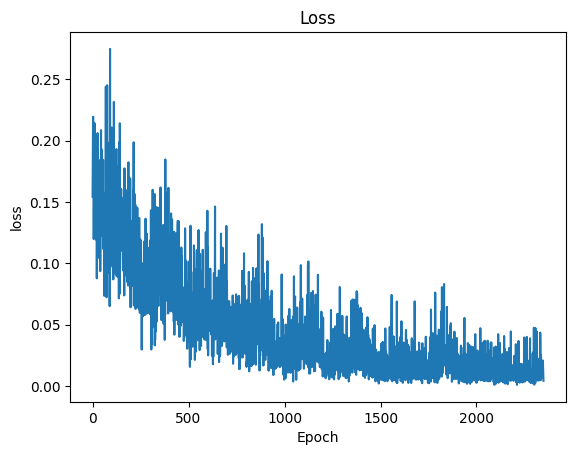

In [71]:
plt.title('Loss')
plt.xlabel("Epoch")
plt.ylabel('loss')

plt.plot(train_loss)

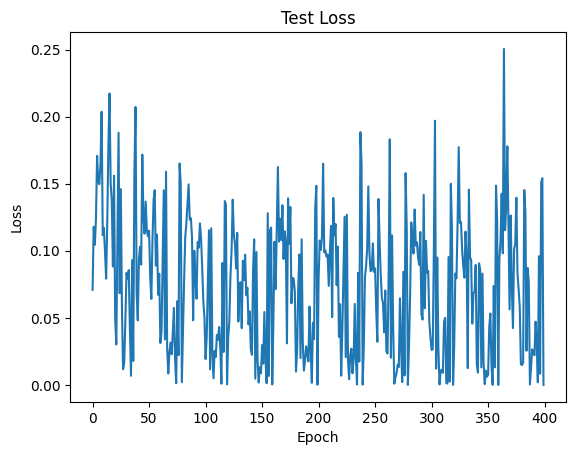

In [72]:
plt.title("Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(test_loss)

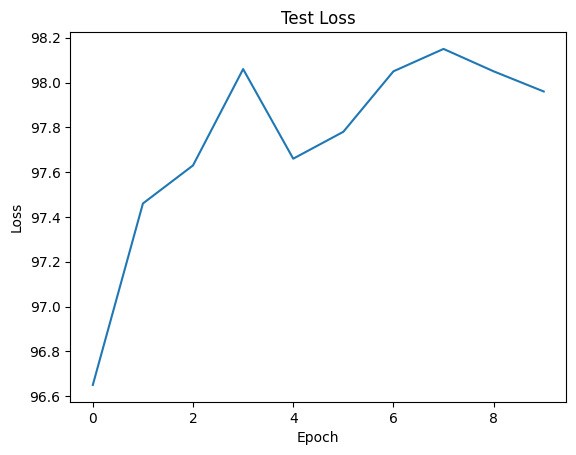

In [73]:
plt.title("Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(test_acc)